# Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read data

In [23]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/ASR_train.csv')

In [24]:
df.head(5)

,ID,up_votes,down_votes,age,gender,transcription
0,002e50c29ac2890c7cb3b3d63dcbe512bc6850de206ca8...,2,0,NaN,NaN,Malicka
1,0031672b4484f963c8a07babe6f713dd559539d44140e8...,2,0,twenties,female,Ecole Elementaire Pikine Nord
2,00362ccc6b48d3ea225e12ddf8a06a9d582cccc03b0353...,2,0,twenties,male,Cimetière de Cambérène
3,0042cdb4d4a015cddacc26d88faffdd714b7a27213d2b3...,2,0,twenties,male,Tournalou Boune
4,00439f02fa8f0dade934bdb317199b71662e9396f6bb81...,2,0,twenties,male,Pharmacie Golf Sud


### Distribution of attributes

{nan: 1497, 'twenties': 4641, 'teens': 332, 'fourties': 94, 'thirties': 119}
{nan: 1497, 'female': 1549, 'male': 3637}
{2: 6622, 3: 61}
{0: 6251, 1: 432}


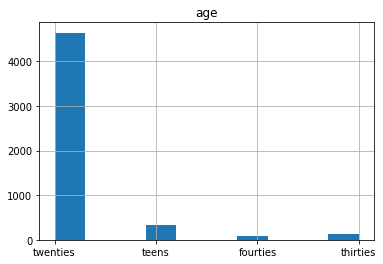

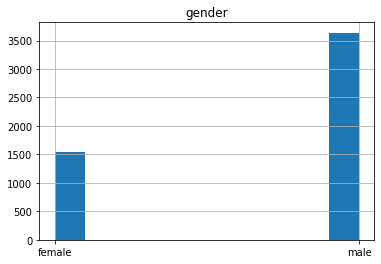

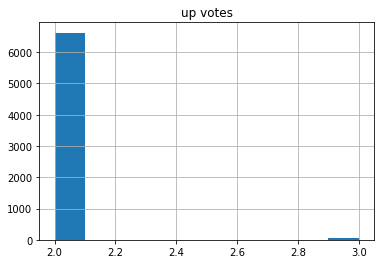

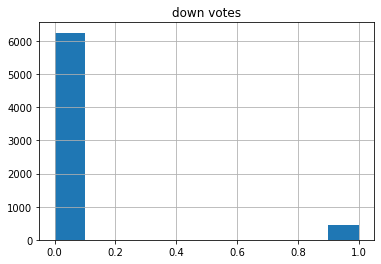

In [53]:
# age
plt.figure()
plt.title('age')
df['age'].hist()
from collections import Counter
count = Counter(df['age'].values)
count = dict(count)
print(count)

# gender
plt.figure()
plt.title('gender')
df['gender'].hist()
from collections import Counter
count = Counter(df['gender'].values)
count = dict(count)
print(count)

# up votes
plt.figure()
plt.title('up votes')
df['up_votes'].hist()
from collections import Counter
count = Counter(df['up_votes'].values)
count = dict(count)
print(count)

# down votes
plt.figure()
plt.title('down votes')
df['down_votes'].hist()
from collections import Counter
count = Counter(df['down_votes'].values)
count = dict(count)
print(count)

### Sentence lengths

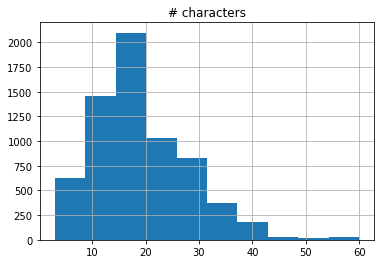

In [124]:
# number of characters
plt.figure()
plt.title('# characters')
df['transcription'].str.len().hist()
plt.show()

In [76]:
# string length vs upvotes / downvotes
import bisect
intervals = [10, 20, 30, 40, 50, 60]
intervals_count = [0, 0, 0, 0, 0, 0]
intervals_upvotes = [0, 0, 0, 0, 0 ,0]
intervals_downvotes = [0, 0, 0, 0, 0 ,0]

for index, row in df.iterrows():
  interval_idx = bisect.bisect_left(intervals, len(row['transcription']))
  intervals_count[interval_idx] += 1
  intervals_upvotes[interval_idx] += row['up_votes']
  intervals_downvotes[interval_idx] += row['down_votes']

#
print('upvotes depending on sequence length')
print(np.asarray(intervals_upvotes)/ np.asarray(intervals_count))

#
print('\n down depending on sequence length')
print(np.asarray(intervals_downvotes)/ np.asarray(intervals_count))


upvotes depending on sequence length
[2.0134357  2.0066879  2.01246459 2.00318471 2.01408451 2.02702703]

 down depending on sequence length
[0.05278311 0.0633758  0.07025496 0.07165605 0.07042254 0.10810811]


### N-grams exploration

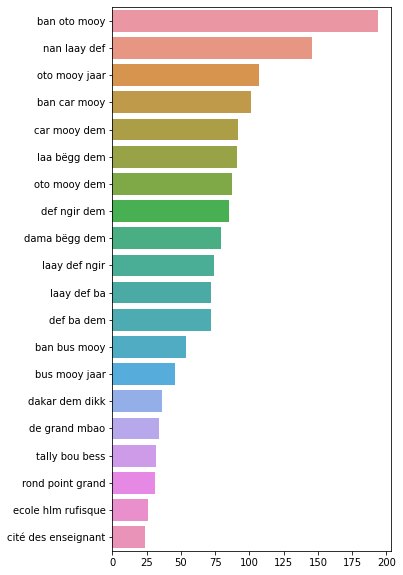

In [122]:
# 3-grams exploration
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_tri_grams = get_top_ngram(df['transcription'],n=3)
x,y = map(list,zip(*top_tri_grams))

plt.figure(figsize=(5, 10))
sns.barplot(x=y,y=x)
plt.show()

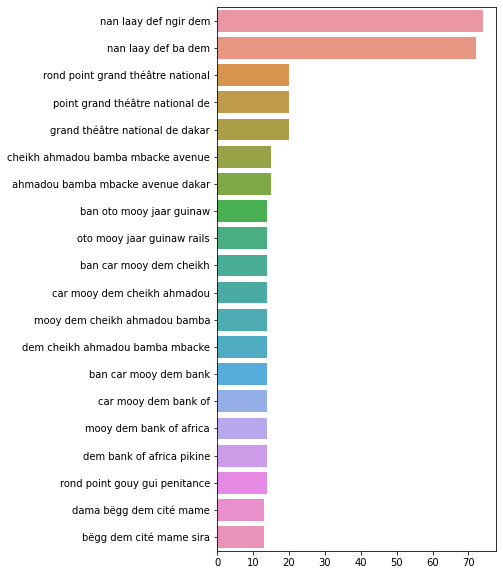

In [126]:
# 4-grams
top_tri_grams = get_top_ngram(df['transcription'],n=5)
x,y = map(list,zip(*top_tri_grams))

plt.figure(figsize=(5, 10))
sns.barplot(x=y,y=x)
plt.show()

### Word cloud

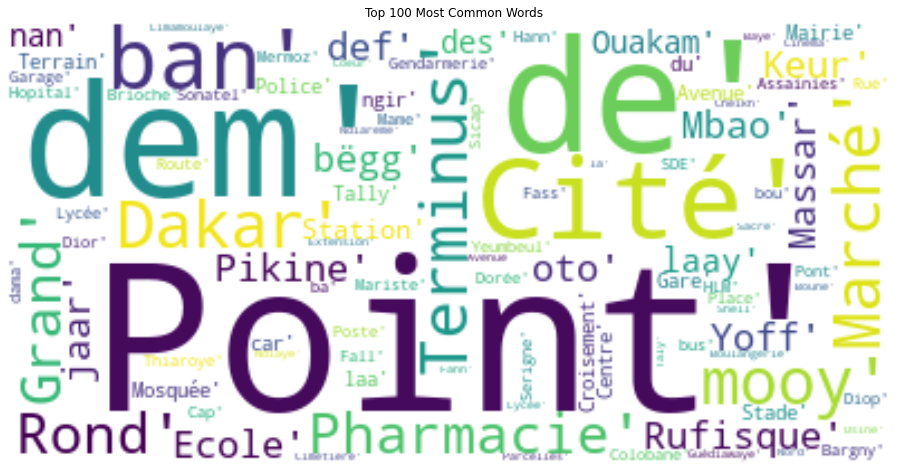

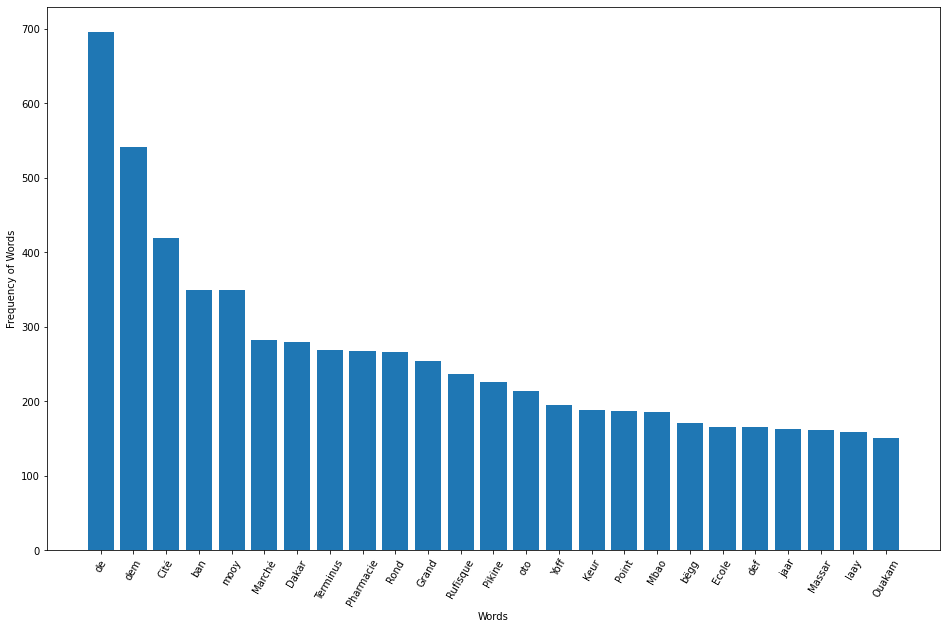

In [123]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

#
words = df['transcription']
allwords = []

for wordlist in words:
  allwords += list(wordlist.split())

# word cloud
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(background_color='white').generate(str(mostcommon))

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

# histogram
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(16,10))
plt.bar(x,y)
plt.xlabel('Words')
plt.ylabel('Frequency of Words')
plt.xticks(rotation=60)
plt.show()

### Part of speech

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


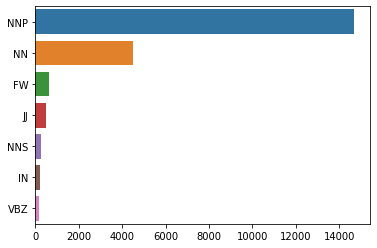

In [110]:
import nltk
from nltk import word_tokenize
import seaborn as sns

# download packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# function to determine part of speech
def pos(text):
  pos=nltk.pos_tag(word_tokenize(text))
  pos=list(map(list,zip(*pos)))[1]
  return pos

tags = df['transcription'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)


### Named entity recognition

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


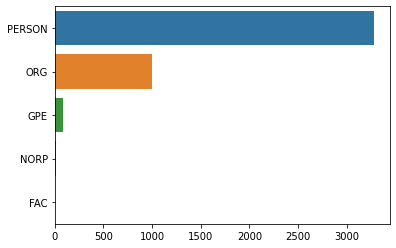

In [114]:
# install necessary packages
!python -m spacy download en_core_web_sm
import spacy

# named entity recognition
nlp = spacy.load("en_core_web_sm")
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent = df['transcription'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

probably flawed since the most common words are (point, cité, marché, pharmacy)

### Text complexity

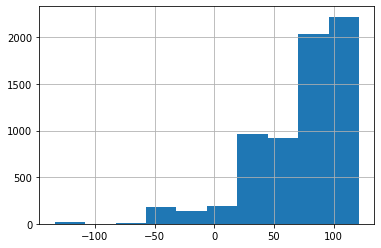

In [127]:
# text complexity (100 easy to understand, 0 difficult to understand)
!pip install textstat
from textstat import flesch_reading_ease

df['transcription'].\
   apply(lambda x : flesch_reading_ease(x)).hist()